## Geopandas and a Map of the Middle World:

On the way to wondering how to create a map of the middle kingdom for Islamic history I also got thinking about creating a personalized Barcelona map. Turns out there are compete geojson files for Barca which are in the included folder.

This [website](https://docs.astraea.earth/hc/en-us/articles/360043919911-Read-a-GeoJSON-File-into-a-GeoPandas-DataFrame) offers some guidance for reading such files into a geopandas data frame. Let's see if it works.

[Hurricane Tracks:](https://blog.matthewgove.com/2021/06/11/python-geopandas-easily-create-stunning-maps-without-a-gis-program/) This might be helpful in layering patches for the extent of the middle world.

[Geopandas Reference:](https://geopandas.org/en/stable/index.html)

In [527]:
import geopandas as gpd
import geoplot as gp
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter
from IPython.display import display, Image
from shapely.geometry import Point

### Global Geopandas Data Sources

The datasets given below are broadly available for general use. Seems potentially useful for drawing low res maps of the world.

In [528]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

### Barcelona Geojson Data Sets

The bcn-geodata contains a multitude of geographic data sets in geojson format. The 2020 data was imported from [this github](https://github.com/martgnz/bcn-geodata). 

A range of other data is available on the [Barcelona municipal open data site](https://opendata-ajuntament.barcelona.cat/en/) which seems like an AWESOME resource. This is the [mapping article](https://diegoquintanav.github.io/folium-barcelona-EN.html) that got me turned on to the data. Need to explore more for sure.

Next two cells read some data in from the database and then print out the .crs (coordinate reference systems) for the dataframe and the type of dataframe to be sure everything is on track.

[Geopandas Projection Info:](https://geopandas.org/en/stable/docs/user_guide/projections.html) There were some issues with the projections at various points in the analysis so itn was suggested to project the data into a Mercator projection as per the linked documentation. The Mercator projection doesn't use lat/long so the geometry values are much larger for determining offsets. Actual units are meters!! Any lat/long information will need to be projected to [EPSG:3395](https://epsg.io/3395) for consistency.


In [591]:
path_to_earth = gpd.datasets.get_path("naturalearth_lowres")
path_to_cities = gpd.datasets.get_path("naturalearth_cities")

earthDF = gpd.read_file(path_to_earth)
citiesDF = gpd.read_file(path_to_cities)

# remove antarctica and reproject to Mercator
earthDF = earthDF[(earthDF.name != "Antarctica") & (earthDF.name != "Fr. S. Antarctic Lands")]
earthDF = earthDF.to_crs("EPSG:3395")
citiesDF = citiesDF.to_crs("EPSG:3395")

# create extra columns of needed info
# centroid is a method so centroid data is not in data base

earthDF['centroid_col'] = earthDF.centroid

# Need a label location for cities that can
# be manipulated relative to location for city.
# Some places I need to move label relative to city
citiesDF['label_location'] = citiesDF['geometry']

In [530]:
earthDF.centroid_col

0       POINT (18248888.547 -1945389.549)
1         POINT (3869303.871 -695667.878)
2        POINT (-1348371.700 2776620.584)
3      POINT (-10797700.204 10408580.130)
4       POINT (-13301024.966 6639297.292)
                      ...                
172       POINT (2316651.341 5475195.661)
173       POINT (2146954.283 5251298.698)
174       POINT (2326059.062 5219544.667)
175      POINT (-6827259.223 1159630.385)
176        POINT (3361518.553 809913.704)
Name: centroid_col, Length: 175, dtype: geometry

In [531]:
citiesDF.columns

Index(['name', 'geometry', 'label_location'], dtype='object')

In [532]:
earthDF.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry',
       'centroid_col'],
      dtype='object')

### ..and then there's plotting!

So much to figure out here and comment. Much learning happening - yikes!

To control the density of the facecolor differently than the density of the edgecolor a stackexchange thread suggested using colorConverter to define a face color WITH the alpha already packaged in. Note that I needed to import the colorConverter library to do this.

Realized that the plot is built up in layers so the order in which I display the layers affects which color is laid on top of the other. Thoughtful choices seem important here.

**Questions:** 

* How do I identify the names of the specific regions. The names don't appear to be in the dataframe -- opening up the geojson file indicated that there 


In [533]:
# continents to help sort through naming conventions

#europe = earthDF[earthDF['continent'] == "Europe"]
#asia = earthDF[earthDF['continent'] == "Asia"]

# countries of interest

# Southern Europe
portugal = earthDF[earthDF.name == 'Portugal']
spain = earthDF[earthDF.name == 'Spain']
france = earthDF[earthDF.name == 'France']
italy = earthDF[earthDF.name == 'Italy']
greece = earthDF[earthDF.name == 'Greece']
slovenia = earthDF[earthDF.name == 'Slovenia']
croatia = earthDF[earthDF.name == 'Croatia']
bosnia = earthDF[earthDF.name == 'Bosnia and Herz.']
montenegro = earthDF[earthDF.name == 'Montenegro']
albania = earthDF[earthDF.name == 'Albania']
austria = earthDF[earthDF.name == 'Austria']
serbia = earthDF[earthDF.name == 'Serbia']
macedonia = earthDF[earthDF.name == 'Macedonia']
kosovo = earthDF[earthDF.name == 'Kosovo']
bulgaria = earthDF[earthDF.name == 'Bulgaria']
balkans = croatia.append(bosnia).append(montenegro).append(albania).append(serbia).append(kosovo).append(macedonia)

# France is an multipolygon country. This set of steps breaks up and retains
# only those parts I want.
exploded = france.explode()
exploded.reset_index(drop = True, inplace= True)
exploded.drop(0, inplace = True)
france = exploded
france['centroid_col'] = exploded.centroid
france

# North Africa
libya = earthDF[earthDF.name == 'Libya']
egypt = earthDF[earthDF.name == 'Egypt']
algeria = earthDF[earthDF.name == 'Algeria']
tunisia = earthDF[earthDF.name == 'Tunisia']
morocco = earthDF[earthDF.name == 'Morocco']

# eastern middle world
india = earthDF[earthDF.name == 'India']
pakistan = earthDF[earthDF.name == 'Pakistan']
afghanistan = earthDF[earthDF.name == 'Afghanistan']
iran = earthDF[earthDF.name == 'Iran']
iraq = earthDF[earthDF.name == 'Iraq']

# Arabian Peninsula
saudiArabia = earthDF[earthDF.name == 'Saudi Arabia']
yemen = earthDF[earthDF.name == 'Yemen']
oman = earthDF[earthDF.name == 'Oman']
kuwait = earthDF[earthDF.name == 'Kuwait']
uae = earthDF[earthDF.name == 'United Arab Emirates']

# the Levant
israel = earthDF[earthDF.name == 'Israel']
lebanon = earthDF[earthDF.name == 'Lebanon']
syria = earthDF[earthDF.name == 'Syria']
jordan = earthDF[earthDF.name == 'Jordan']

# append to form regions
northAfrica = libya.append(algeria).append(egypt).append(tunisia).append(morocco)
southEurope = portugal.append(spain).append(france).append(italy).append(greece).append(slovenia)
southEurope = southEurope.append(balkans).append(austria).append(serbia).append(slovenia).append(bulgaria)
persiaIndia = india.append(pakistan).append(afghanistan).append(iran).append(iraq)
arabia = saudiArabia.append(kuwait).append(oman).append(uae).append(yemen)
levant = israel.append(lebanon).append(jordan).append(syria)

# tidy up indices which are from original file
northAfrica.reset_index(drop = True, inplace= True)
southEurope.reset_index(drop = True, inplace= True)
persiaIndia.reset_index(drop = True, inplace= True)
arabia.reset_index(drop = True, inplace= True)
levant.reset_index(drop = True, inplace= True)


In [534]:
northAfrica

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroid_col
0,6653210,Africa,Libya,LBY,90890.0,"POLYGON ((2782987.270 2495525.394, 2782987.270...",POINT (1997803.634 3119462.805)
1,40969443,Africa,Algeria,DZA,609400.0,"POLYGON ((-966742.962 3153346.416, -964597.245...",POINT (289050.316 3285803.763)
2,97041072,Africa,Egypt,EGY,1105000.0,"POLYGON ((4103929.951 2495525.394, 3662411.247...",POINT (3321337.184 3055338.636)
3,11403800,Africa,Tunisia,TUN,130800.0,"POLYGON ((1055546.988 3521585.610, 1008065.076...",POINT (1061193.363 4034775.847)
4,33986655,Africa,Morocco,MAR,282800.0,"POLYGON ((-241553.688 4162177.843, -199594.267...",POINT (-922293.516 3493781.850)


In [535]:
citiesDF.label_location.x

0      1.386305e+06
1      1.385012e+06
2      1.059391e+06
3      6.823888e+05
4      1.760517e+07
           ...     
197    3.478514e+06
198    1.555684e+07
199    2.595291e+05
200   -7.866836e+06
201    1.156096e+07
Length: 202, dtype: float64

In [536]:
southEurope

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroid_col
0,10839514,Europe,Portugal,PRT,297100.0,"POLYGON ((-1005751.303 5114573.736, -965356.58...",POINT (-896458.075 4791952.660)
1,48958159,Europe,Spain,ESP,1690000.0,"POLYGON ((-829744.933 4426970.693, -839026.744...",POINT (-402371.289 4901516.902)
2,67106161,Europe,France,-99,2699000.0,"POLYGON ((688658.040 6321436.645, 741190.730 6...",POINT (259800.512 5866725.592)
3,67106161,Europe,France,-99,2699000.0,"POLYGON ((973601.285 5226592.314, 1045290.113 ...",POINT (1011243.372 5160139.418)
4,62137802,Europe,Italy,ITA,2221000.0,"MULTIPOLYGON (((1162476.208 5893505.287, 12299...",POINT (1344468.493 5270796.742)
5,10768477,Europe,Greece,GRC,290500.0,"MULTIPOLYGON (((2926589.734 4180032.155, 29126...",POINT (2529238.015 4712539.724)
6,1972126,Europe,Slovenia,SVN,68350.0,"POLYGON ((1536929.818 5831331.902, 1628879.282...",POINT (1663135.639 5770142.796)
7,4292095,Europe,Croatia,HRV,94240.0,"POLYGON ((1843986.034 5830436.273, 1879352.983...",POINT (1844169.050 5597147.717)
8,3856181,Europe,Bosnia and Herz.,BIH,42530.0,"POLYGON ((2066089.749 5229890.978, 1967563.261...",POINT (1983006.808 5465062.356)
9,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((2234260.104 5220640.910, 2204305.520...",POINT (2146954.283 5251298.698)


In [583]:
# scaleable offset for labels

labeloffset = .5

# cities of interest

# North Africa
cairo = citiesDF[citiesDF.name == 'Cairo']
tunis = citiesDF[citiesDF.name == 'Tunis']
tripoli = citiesDF[citiesDF.name == 'Tripoli']
algiers = citiesDF[citiesDF.name == 'Algiers']
#casablanca = citiesDF[citiesDF.name == 'Casablanca'] #apparently no Casablanca
rabat = citiesDF[citiesDF.name == 'Rabat']

# Southern Europe
paris = citiesDF[citiesDF.name == 'Paris']
lisbon = citiesDF[citiesDF.name == 'Lisbon']
madrid = citiesDF[citiesDF.name == 'Madrid']
rome = citiesDF[citiesDF.name == 'Rome']
athens = citiesDF[citiesDF.name == 'Athens']

# Eastern Middle World
kabul = citiesDF[citiesDF.name == 'Kabul']
tehran = citiesDF[citiesDF.name == 'Tehran']
baghdad = citiesDF[citiesDF.name == 'Baghdad']
islamabad = citiesDF[citiesDF.name == 'Islamabad']
newDelhi = citiesDF[citiesDF.name == 'New Delhi']

# Arabian Peninsula
riyadh = citiesDF[citiesDF.name == 'Riyadh']
sanaa = citiesDF[citiesDF.name == 'Sanaa']
muscat = citiesDF[citiesDF.name == 'Muscat']
abuDhabi = citiesDF[citiesDF.name == 'Abu Dhabi']
mecca = citiesDF[citiesDF.name == 'Mecca']

# move labels as needed

# Levant
jerusalem = citiesDF[citiesDF.name == 'Jerusalem']
beirut = citiesDF[citiesDF.name == 'Beirut']
damascus = citiesDF[citiesDF.name == 'Damascus']
amman = citiesDF[citiesDF.name == 'Amman']

# Group cities
citiesNA = cairo.append(tunis).append(tripoli).append(algiers).append(rabat)
citiesSE = paris.append(lisbon).append(madrid).append(rome).append(athens)
citiesMWE = kabul.append(tehran).append(baghdad).append(islamabad).append(newDelhi)
citiesAP = riyadh.append(sanaa).append(abuDhabi).append(mecca).append(muscat)
citiesLV = jerusalem.append(beirut).append(damascus).append(amman)

citiesNA.reset_index(drop = True, inplace= True)
citiesSE.reset_index(drop = True, inplace= True)
citiesMWE.reset_index(drop = True, inplace= True)
citiesAP.reset_index(drop = True, inplace= True)
citiesLV.reset_index(drop = True, inplace= True)

In [584]:
citiesSE

,name,geometry,label_location
0,Paris,POINT (259529.088 6220400.627),POINT (259529.088 6220400.627)
1,Lisbon,POINT (-1018218.472 4655575.004),POINT (-1018218.472 4655575.004)
2,Madrid,POINT (-410245.446 4896828.554),POINT (-410245.446 4896828.554)
3,Rome,POINT (1389413.359 5117155.672),POINT (1389413.359 5117155.672)
4,Athens,POINT (2641764.606 4551044.554),POINT (2641764.606 4551044.554)


In [585]:
citiesAP.at[2, 'name']

'Abu Dhabi'

In [586]:
citiesSE

,name,geometry,label_location
0,Paris,POINT (259529.088 6220400.627),POINT (259529.088 6220400.627)
1,Lisbon,POINT (-1018218.472 4655575.004),POINT (-1018218.472 4655575.004)
2,Madrid,POINT (-410245.446 4896828.554),POINT (-410245.446 4896828.554)
3,Rome,POINT (1389413.359 5117155.672),POINT (1389413.359 5117155.672)
4,Athens,POINT (2641764.606 4551044.554),POINT (2641764.606 4551044.554)


### Name and City for a single country

Typically I pull the name from the name column and the centroid is the 'center of mass' of the polygon that represents the country

In [587]:
cities.geometry.x


0    31.248022
1    10.179678
2    13.180012
3     3.048607
4    -6.836408
dtype: float64

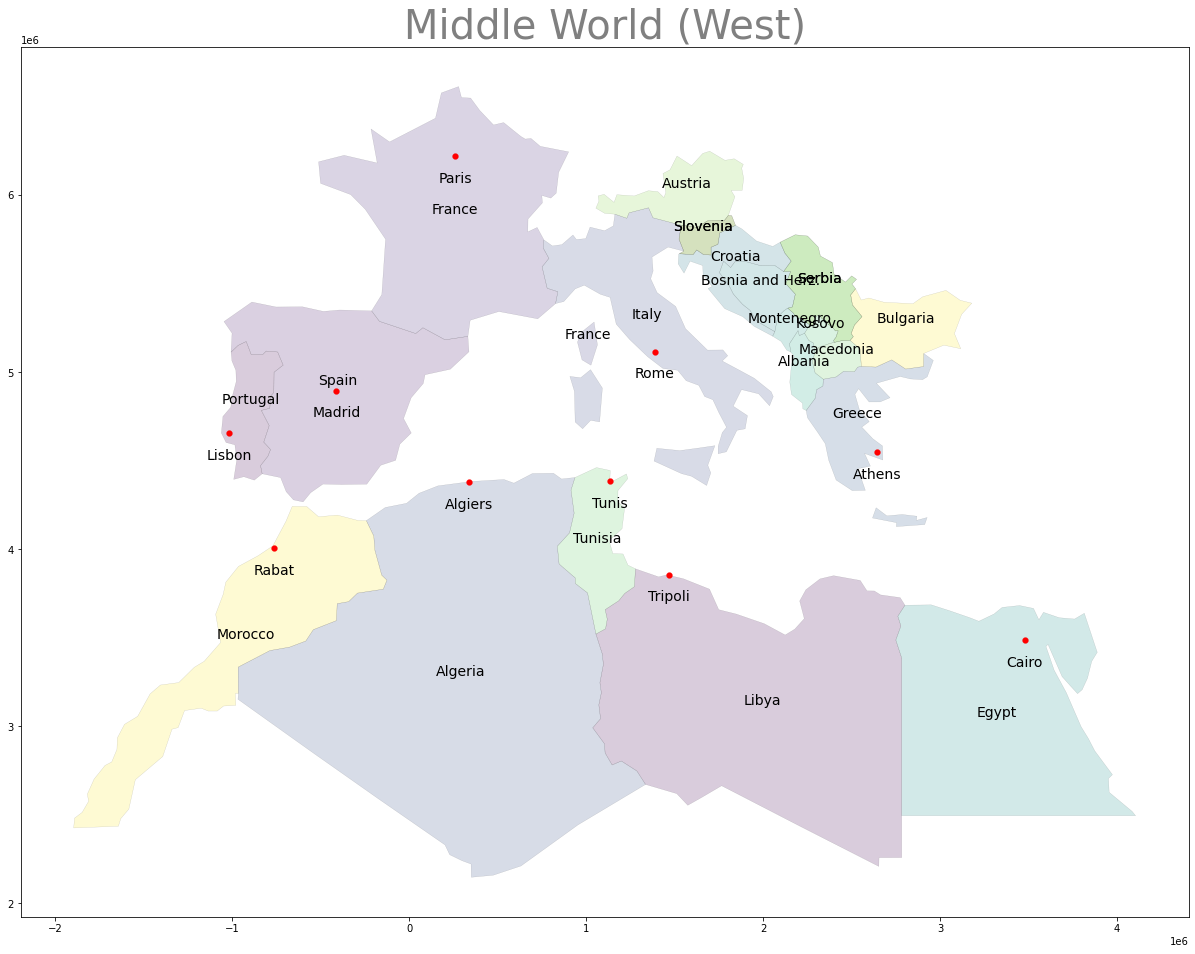

In [588]:
fig, ax = plt.subplots(figsize=(24,16))

plotLabelOffset = 150000.

fc1 = colorConverter.to_rgba('green', alpha=0.2)

northAfrica.plot(ax=ax, cmap = 'viridis',edgecolor='k', linewidth=0.3, alpha = 0.2) 
southEurope.plot(ax=ax, cmap = 'viridis',edgecolor='k', linewidth=0.3, alpha = 0.2) 

citiesNA.plot(ax=ax, facecolor = 'r',edgecolor='r', linewidth=0.2)
citiesSE.plot(ax=ax, facecolor = 'r',edgecolor='r', linewidth=0.2)

for count,name in enumerate(northAfrica.name):
    ax.annotate(text = name, xy = (northAfrica.centroid_col.x[count], northAfrica.centroid_col.y[count]), ha='center', fontsize=14)

for countC,nameC in enumerate(citiesNA.name):
    ax.annotate(text = nameC, xy = (citiesNA.geometry.x[countC], citiesNA.geometry.y[countC] - plotLabelOffset), ha='center', fontsize=14)
    
for count,name in enumerate(southEurope.name):
    ax.annotate(text = name, xy = (southEurope.centroid_col.x[count], southEurope.centroid_col.y[count] + plotLabelOffset/5.), ha='center', fontsize=14)

for countC,nameC in enumerate(citiesSE.name):
    ax.annotate(text = nameC, xy = (citiesSE.geometry.x[countC], citiesSE.geometry.y[countC] - plotLabelOffset), ha='center', fontsize=14)

plt.title("Middle World (West)", fontsize=40, color='grey')
#plt.xlim(2.125, 2.150)
#plt.ylim(41.375, 41.400)
#plt.axis('equal')

plt.show()

### Eastern Half of Middle World

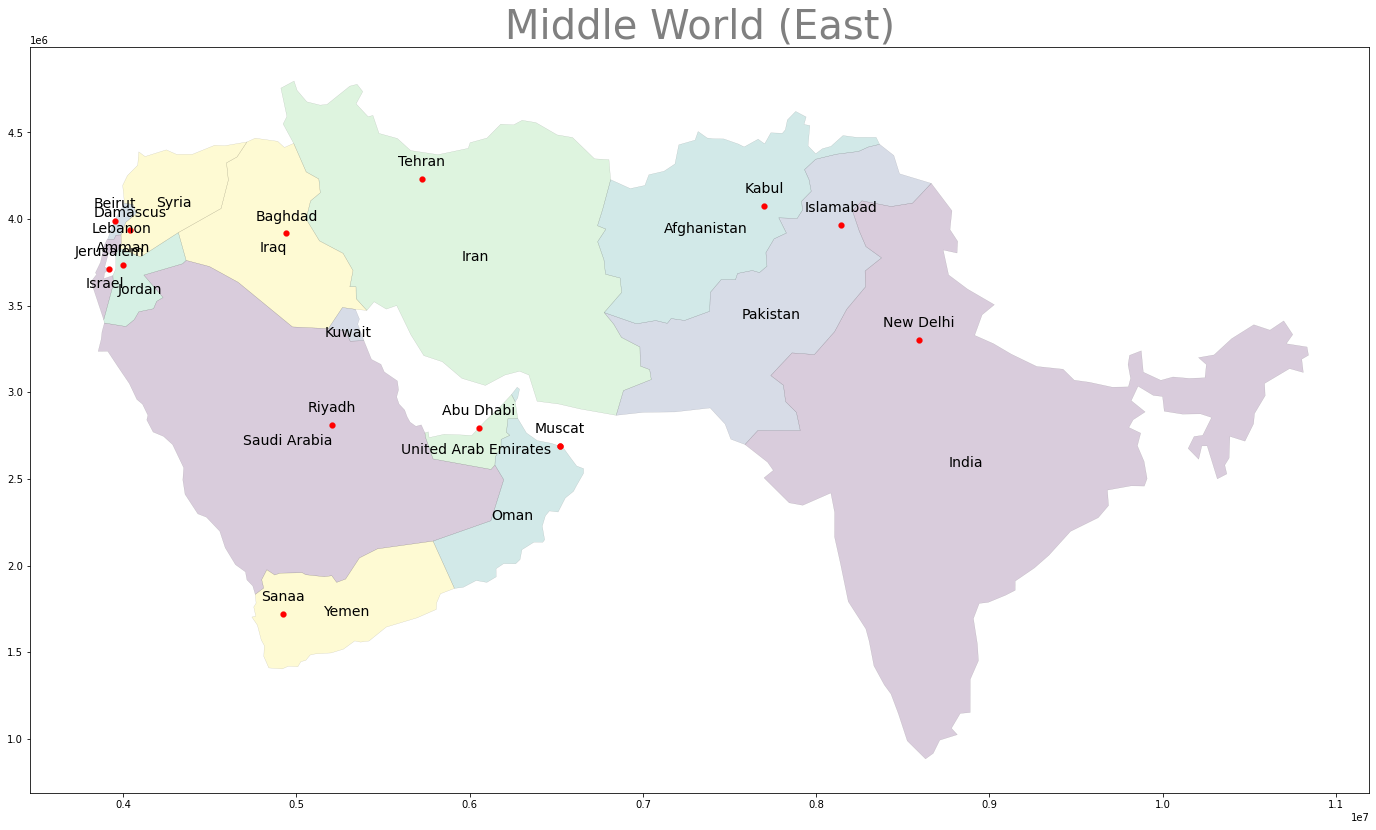

In [589]:
fig2, ax2 = plt.subplots(figsize=(24,16))

plotLabelOffsetB = 75000.
fc1 = colorConverter.to_rgba('green', alpha=0.2)

persiaIndia.plot(ax=ax2, cmap = 'viridis',edgecolor='k', linewidth=0.3, alpha = 0.2) 
arabia.plot(ax=ax2, cmap = 'viridis',edgecolor='k', linewidth=0.3, alpha = 0.2) 
levant.plot(ax=ax2, cmap = 'viridis',edgecolor='k', linewidth=0.3, alpha = 0.2) 

citiesMWE.plot(ax=ax2, facecolor = 'r',edgecolor='r', linewidth=0.2)
citiesAP.plot(ax=ax2, facecolor = 'r',edgecolor='r', linewidth=0.2)
muscat.plot(ax=ax2, facecolor = 'r',edgecolor='r', linewidth=0.2)
citiesLV.plot(ax=ax2, facecolor = 'r',edgecolor='r', linewidth=0.2)

for count,name in enumerate(persiaIndia.name):
    ax2.annotate(text = name, xy = (persiaIndia.centroid_col.x[count], persiaIndia.centroid_col.y[count]-plotLabelOffsetB), ha='center', fontsize=14)
for count,name in enumerate(arabia.name):
    ax2.annotate(text = name, xy = (arabia.centroid_col.x[count], arabia.centroid_col.y[count] - plotLabelOffsetB), ha='center', fontsize=14)
for count,name in enumerate(levant.name):
    ax2.annotate(text = name, xy = (levant.centroid_col.x[count], levant.centroid_col.y[count] - plotLabelOffsetB), ha='center', fontsize=14)
    
for countC,nameC in enumerate(citiesMWE.name):
    ax2.annotate(text = nameC, xy = (citiesMWE.geometry.x[countC], citiesMWE.geometry.y[countC]+plotLabelOffsetB), ha='center', fontsize=14)
for countC,nameC in enumerate(citiesAP.name):
    ax2.annotate(text = nameC, xy = (citiesAP.geometry.x[countC], citiesAP.geometry.y[countC]+plotLabelOffsetB), ha='center', fontsize=14)
for countC,nameC in enumerate(citiesLV.name):
    ax2.annotate(text = nameC, xy = (citiesLV.geometry.x[countC], citiesLV.geometry.y[countC]+plotLabelOffsetB), ha='center', fontsize=14)    

plt.title("Middle World (East)", fontsize=40, color='grey')
#plt.xlim(2.125, 2.150)
#plt.ylim(41.375, 41.400)
#plt.axis('equal')

plt.show()